# What sells a car?

A study of data collected over the last few years that determine which factors influence the price of a vehicle.

 ## Contents <a id='back'></a>
 * [Introduction](#intro)
 * [Data expolration](#data_expolration)
 * [Data transformation](#data_transformation)
 * [Working with missing values](#working_with_missing_values)
 * [Categorization of data](#Categorization_of_data)
 * [Checking the Hypotheses](#checking_the_hypotheses)
 * [General conclution](#general_conclution)


## Introduction <a id='data_review'></a>

This is an analysis of the hundreds of free advertisements for vehicles that are published. 

### **The Purpose of this project:** <a id='data_review'></a>

This data attempts to find the factors that influence the price of a vehicles. 

### **The Hypothes being tested:** <a id='data_review'></a>

The factors below influence the price of a vehicles: 
- vehicle's age 
- mileage 
- vehicle condition 


### **Task decomposition:** <a id='data_review'></a>

- Data preprocessing
    - Identify and correcting missing values
    - Convert the data to the required types
- Calculating data in table and include more columns in the table
- Carrying out exploratory data analysis
    - Study the following parameters & Plot histograms for each: 
        - price 
        - vehicle's age 
        - when the ad was placed 
        - mileage 
        - number of cylinders 
        - vehicle condition
     - Determine the upper limits of outliers
         - remove the outliers and store them in a separate DataFrame
     - Study how many days advertisements were displayed and plot a histogram
     - Analyze the number of ads and the average price for each type of vehicle and plot on a graph 
- An overall conclusion

## Initialization

In [38]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [39]:
# Load the data file into a DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')

In [40]:
display(df)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [41]:
# print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [42]:
# print a sample of data
df.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
23359,6950,2013.0,chevrolet malibu,excellent,4.0,gas,104000.0,automatic,sedan,grey,1.0,2018-12-06,153


In [43]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [44]:
print(df.duplicated().sum()) 

0


**Data Quality Assessment**

Initial assessment of data 

- There are multiple fields in the dataset that are missing
- Most of the data in the columns appropriately match the column titles
- The column `is_4wd` is an either or column and should be Boolean data type
- The column `date_posted` is object and because it is a date it should be a Date data type
- The column `type` has lowercasse and uppercase
- There are not duplications in the dataset

In [45]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

There is data missing in the following columns:

- `model_year`
- `cylinders`
- `odometer`
- `paint_color`
- `is_4wd`

### Conclusions and further steps


There are multiple fields in the dataset that are missing.
The next steps to be taken are:
-	Fix missing data
-	Establish the correct data types 

## Treat missing values (if any)

There is data missing in the following columns:

- `model_year`
- `cylinders`
- `odometer`
- `paint_color`
- `is_4wd`

**Treating missing values in `model_year` column**

In [46]:
print(df["model_year"].value_counts())
print()
print(df["model_year"].unique())
print()
print("Number of Missing values in column 'model_year': ", df["model_year"].isna().sum())

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1955.0       1
Name: model_year, Length: 68, dtype: int64

[2011.   nan 2013. 2003. 2017. 2014. 2015. 2012. 2008. 2018. 2009. 2010.
 2007. 2004. 2005. 2001. 2006. 1966. 1994. 2019. 2000. 2016. 1993. 1999.
 1997. 2002. 1981. 1995. 1996. 1975. 1998. 1985. 1977. 1987. 1974. 1990.
 1992. 1991. 1972. 1967. 1988. 1969. 1989. 1978. 1965. 1979. 1968. 1986.
 1980. 1964. 1963. 1984. 1982. 1973. 1970. 1955. 1971. 1976. 1983. 1954.
 1962. 1948. 1960. 1908. 1961. 1936. 1949. 1958. 1929.]

Number of Missing values in column 'model_year':  3619


The value numbers in the column `model_year` are descriptive of the date of each vehicle was manufactured we have no way of knowing when each vehicle was manufactured and therefore the missing values can be replaced with the median year with similar models.  

In [47]:
#Replacing missing values with n model_year column
df_model_agg = df.groupby(['model'])['model_year'].transform('median')
df['model_year'] = df['model_year'].fillna(df_model_agg)

In [48]:
#Testing if missing values were replaced
print("Number of Missing values in column 'model_year': ", df["model_year"].isna().sum())

Number of Missing values in column 'model_year':  0


**Treating missing values in `cylinders` column**

In [49]:
print(df["cylinders"].value_counts())
print()
print(df["cylinders"].unique())

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

[ 6.  4.  8. nan  5. 10.  3. 12.]


The value numbers in the column `cylinders` are descriptive of the engine of each vehicle, we have no way of knowing which engine type each vehicle has and therefore the missing values can be replaced with the with the median with similar models.  

In [55]:
#Replacing missing values with in cylinders column

df_cy_agg = df.groupby(['model'])['cylinders'].transform('median')
df['cylinders'] = df['cylinders'].fillna(df_cy_agg)


In [56]:
#Testing if missing values were replaced
print("Number of Missing values in column 'cylinders': ", df["cylinders"].isna().sum())

Number of Missing values in column 'cylinders':  0


**Treating missing values in `odometer` column**

In [57]:
#Testing if missing values were replaced
print("Number of Missing values in column 'model_year': ", df["odometer"].isna().sum())

Number of Missing values in column 'model_year':  7892


In [58]:
print(df["odometer"].value_counts())
print()
print(df["odometer"].unique())
print()
print(df["odometer"].describe())

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
280499.0      1
49814.0       1
194920.0      1
140800.0      1
269527.0      1
Name: odometer, Length: 17762, dtype: int64

[145000.  88705. 110000. ... 121778. 181500. 139573.]

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64


The `odometer` column contains numbers which their values are important to the research being conducted. To state the missing values as unknown in would lower the statistical value of this column.

- The current minimum value for the column `odometer`: 0
- The current maximum value for the column `odometer`: 990000.000000

These two values are the range of any odometer which means that these values are the maximum and minimum possible. This increases the likelihood of the presence of outliers making the use of the median instead of the mean to replace the missing values a better option as  the mean is more susceptible to being affected by outliers.


In [61]:
#Replacing missing values with in odometer column
odometer_median = df.groupby('model')[['odometer']].median().reset_index()
odometer_median.columns = ['model','odometer_median']
odometer_median

df = df.merge(odometer_median,on='model')

df['odometer'] = df['model'].fillna(df['odometer_median'])

In [62]:
#Testing if missing values were replaced
print("Number of Missing values in column 'paint_color': ", df["odometer"].isna().sum())

Number of Missing values in column 'paint_color':  0


**Treating missing values in `paint_color` column**

In [63]:
print(df["paint_color"].value_counts())
print()
print(df["paint_color"].unique())

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

[nan 'black' 'blue' 'white' 'silver' 'grey' 'green' 'brown' 'red' 'custom'
 'purple' 'yellow' 'orange']


The value numbers in the column `paint_color` are descriptive of the paint of each vehicle we have no way of knowing the color of each vehicle and therefore the missing values can be replaced with the term ‘unknown’.

In [64]:
#Replacing missing values with unknown in paint_color column
df['paint_color'] = df['paint_color'].fillna('unknown')

In [65]:
#Testing if missing values were replaced
print("Number of Missing values in column 'paint_color': ", df["paint_color"].isna().sum())

Number of Missing values in column 'paint_color':  0


In [66]:
#Testing if missing values were replaced
print("Number of Missing values in colume 'paint_color': ", df["paint_color"].isna().sum())

Number of Missing values in colume 'paint_color':  0


**Treating missing values in `is_4wd` column**

In [67]:
print(df["is_4wd"].value_counts())
print()
print(df["is_4wd"].unique())

1.0    25572
Name: is_4wd, dtype: int64

[ 1. nan]


The column `is_4wd` is an either-or column and should be Boolean data type. There is currently only one value in column 1.0 let’s assume that this means that it is true. Therefore, the NaN value should be 0 which is the false value. 

The next step would to make the NaN values 0


In [68]:
#Replaing all missing values in column is_4wd with 0 and makinng it a Boolean datat type
df['is_4wd'] = df['is_4wd'].fillna(0)

df['is_4wd'] = df['is_4wd'].astype('bool')

In [69]:
#Testing if missing values were replaced
print("Number of Missing values in colume 'is_4wd': ", df["is_4wd"].isna().sum())

Number of Missing values in colume 'is_4wd':  0


**Treating missing values in `type` column**

In [70]:
#checking the data that is in the type column
df['type'].unique()

array(['SUV', 'wagon', 'sedan', 'truck', 'van', 'hatchback', 'pickup',
       'offroad', 'mini-van', 'other', 'coupe', 'convertible', 'bus'],
      dtype=object)

In [71]:
#correcting the data that is in the type column
df['type'] = df['type'].str.lower() 

In [72]:
#checking the data that is in the type column
df['type'].unique()

array(['suv', 'wagon', 'sedan', 'truck', 'van', 'hatchback', 'pickup',
       'offroad', 'mini-van', 'other', 'coupe', 'convertible', 'bus'],
      dtype=object)

In [73]:
# print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            51525 non-null  int64  
 1   model_year       51525 non-null  float64
 2   model            51525 non-null  object 
 3   condition        51525 non-null  object 
 4   cylinders        51525 non-null  float64
 5   fuel             51525 non-null  object 
 6   odometer         51525 non-null  object 
 7   transmission     51525 non-null  object 
 8   type             51525 non-null  object 
 9   paint_color      51525 non-null  object 
 10  is_4wd           51525 non-null  bool   
 11  date_posted      51525 non-null  object 
 12  days_listed      51525 non-null  int64  
 13  odometer_median  51484 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(8)
memory usage: 5.6+ MB


## Fix data types

In [74]:
#Correcting the date_posted datat type
df['date_posted'] = pd.to_datetime(df['date_posted'], format ='%Y-%m-%d')

In [75]:
#Checking if the data types are corrected
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  float64       
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        51525 non-null  float64       
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  object        
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  odometer_median  51484 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64

## Enrich data

In [76]:
# Add datetime values for when the ad was placed
df['year_posted'] = df['date_posted'].dt.year
df['month_posted'] = df['date_posted'].dt.month
df['day_posted'] = df['date_posted'].dt.weekday

In [77]:
# Add the vehicle's age when the ad was placed
df['vehicle_age'] = df['year_posted'] - df['model_year']

In [78]:
# Add the vehicle's average mileage per year
df["mileage_per_year"]  = df["year_posted"] - pd.to_datetime(df["model_year"], format="%Y").astype(int) + 1

In [79]:
# It might help to replace the condition values with something that can be manipulated more easily
print(df['condition'].value_counts())

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64


The condition column has been categorized as:
- excellent
- good
- like new
- fair
- new
- salvage

For inorder to easily manipulate the data it can be changed to numeric values:
- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0


In [80]:
    dict_cond = {'new': 5,
                'like new': 4,
                'excellent': 3,
                'good': 2,
                'fair': 1,
                'salvage': 0}

    df['condition'] = df['condition'].map(dict_cond)

In [81]:
print(df['condition'].value_counts())

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64


In [82]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_median,year_posted,month_posted,day_posted,vehicle_age,mileage_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,bmw x5,automatic,suv,unknown,True,2018-06-23,19,108500.0,2018,6,5,7.0,-1293839999999997981
1,3200,2004.0,bmw x5,3,6.0,gas,bmw x5,automatic,suv,black,True,2019-04-09,10,108500.0,2019,4,1,15.0,-1072915199999997980
2,8499,2009.0,bmw x5,2,6.0,gas,bmw x5,automatic,suv,blue,True,2019-03-04,52,108500.0,2019,3,0,10.0,-1230767999999997980
3,22914,2015.0,bmw x5,3,6.0,gas,bmw x5,automatic,suv,white,True,2018-08-11,19,108500.0,2018,8,5,3.0,-1420070399999997981
4,22914,2015.0,bmw x5,3,6.0,gas,bmw x5,automatic,suv,white,True,2018-07-07,9,108500.0,2018,7,5,3.0,-1420070399999997981


## Check clean data

In [83]:
# print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  float64       
 2   model             51525 non-null  object        
 3   condition         51525 non-null  int64         
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  object        
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  odometer_median   51484 non-null  float64       
 14  year_posted       5152

In [84]:
# print a sample of data
df.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_median,year_posted,month_posted,day_posted,vehicle_age,mileage_per_year
17301,45000,2008.0,chevrolet corvette,2,8.0,gas,chevrolet corvette,manual,coupe,unknown,False,2018-07-07,64,60000.0,2018,7,5,10.0,-1199145599999997981


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

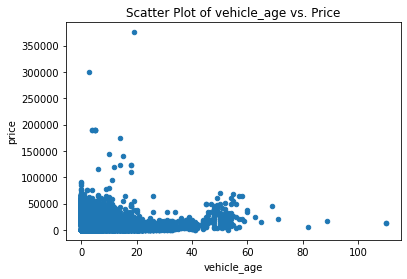

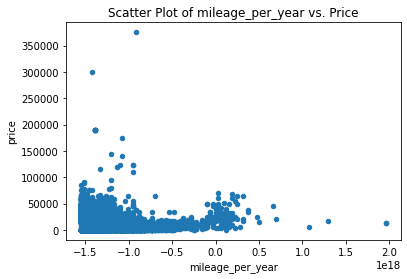

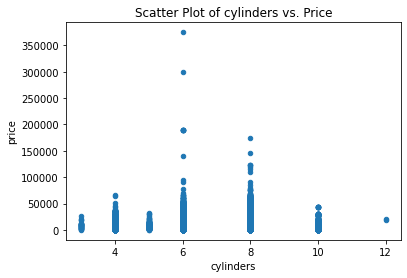

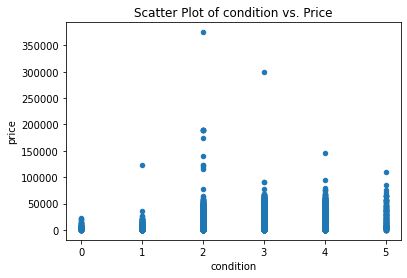

In [85]:
variables = ['vehicle_age', 'mileage_per_year', 'cylinders', 'condition']
for variable in variables:
    df.plot(x=variable, y='price', kind='scatter', title=f'Scatter Plot of {variable} vs. Price')

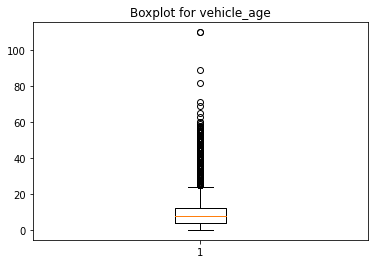

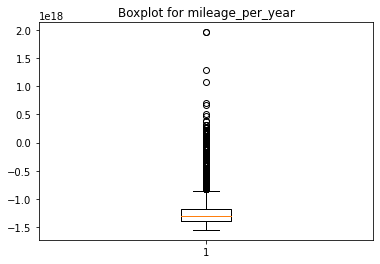

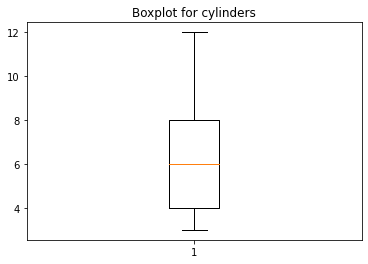

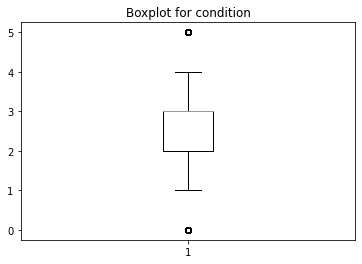

In [86]:
columns = ['vehicle_age', 'mileage_per_year', 'cylinders', 'condition']

for col in columns:
    plt.figure() 
    plt.boxplot(df[col])
    plt.title(f'Boxplot for {col}') 

This dataframe contains outliers that need to be addressed.

**An interpretation of the ourliers**

From the graphs above we can see that: 

The `vehicle_age` when compared with the price shows that: 
-	the majority of vehicles in the data set are positioned between 0 and 60 years and prices between 0 and 50000 price points
-	vehicles aged older than 60 years are  anomaly’s and tend to be lowly priced – this could be vehicles keep in the system that are unsold and have depreciated
-	the vehicles aged between 0 and 20 years above the 50000 price point are most likely exotic vehicles that are sold in lower quantities yet at higher prices

The `mileage_per_year` when compared with the price shows that: 
-	has a similar trend as the `vehicle_age` graph
-	the majority of vehicles in the data set are positioned between 0 and 50000 price points
-	higher milage vehicles are outliers – this could be vehicles keep in the system that are unsold and have depreciated
-	the vehicles with lower milage aged above the 50000 price point are most likely exotic vehicles that are sold in lower quantities yet at higher prices

The ` cylinders` when compared with the price shows that:
-	majority of the cars are 6 and 8 cylinders 
-	yet the 6 cylinders and 8 cylinders contain outliers which is indicative of exotic vehicles that are sold in lower quantities yet at higher prices

The ` condition ` when compared with the price shows that:

Condition index:
new = 5
like new = 4
excellent = 3
good = 2
fair = 1
salvage = 0

-	The majority of vehicles purchased are the between 2,3,4 and 5
-	the pricing for them are between 0 and 50000 price points
-	the outliers of all condition are above the 50000 price point are most likely exotic vehicles that are sold in lower quantities yet at higher prices


## Study and treat outliers

Treating the Outlier for the columns:

- Price
- The vehicle's age when the ad was placed
- Mileage

In [95]:
    def upper_lower_limit(column, df):

        q1 = df['price'].quantile(0.25)
        q3 = df['price'].quantile(0.75)
        IQR = q3 - q1

        lim_inf = q1 - 1.5 * IQR
        lim_sup = q3 + 1.5 * IQR

        #filter outliers
        df_filtered = df[(df['price'] >= lim_inf) & (df['price'] <= lim_sup)]
        return df_filtered

    # implement the loop statement that recursively filters values out.
    df_filter = df.copy()
    for col in ['price', 'vehicle_age', 'mileage_per_year']:

        df_filter = upper_lower_limit(col, df_filter) # df_filter will be your new data without outliers


## Study core parameters without outliers

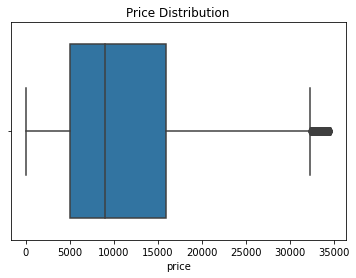

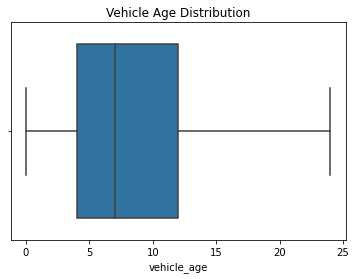

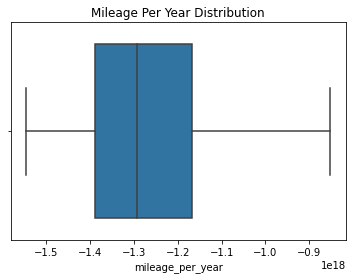

In [96]:
columns_to_plot = ['price', 'vehicle_age', 'mileage_per_year']

for column in columns_to_plot:
    sns.boxplot(data=df, x=df_copy[column])
    plt.title(f'{column.replace("_", " ").title()} Distribution')
    plt.show()

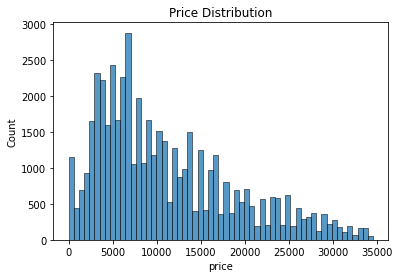

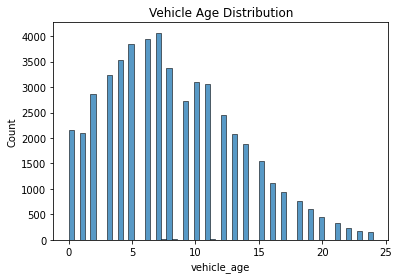

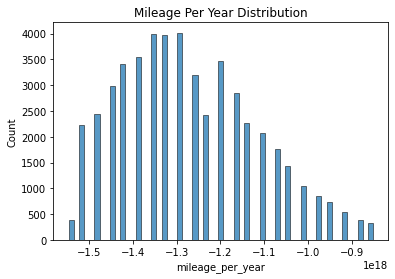

In [97]:
columns_to_plot = ['price', 'vehicle_age', 'mileage_per_year']

for column in columns_to_plot:
    sns.histplot(data=df, x=df_copy[column])
    plt.title(f'{column.replace("_", " ").title()} Distribution')
    plt.show()

**An interpretation of the dataframe without outliers**

An interpretation of the above graphs depicts the columns with the outliers removed.
All three graphs namely `price`, `vehicle_age` & `mileage_per_year` are:
-	Positively skewed

What this means for the `price` 
-	Most vehicles are priced between 5000 and 17000 price points
-	The Median (Q2) is placed at 8500 price points

What this means for the `vehicle_age` 
-	Most vehicles are aged between 4 and 13 years
-	The Median (Q2) is placed 7 years


## Ads lifetime


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  float64       
 2   model             51525 non-null  object        
 3   condition         51525 non-null  int64         
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  object        
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  odometer_median   51484 non-null  float64       
 14  year_posted       5152

**Describing the typical lifetime of an ad.**

In [99]:
df['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

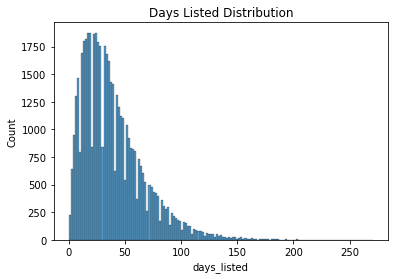

In [100]:
sns.histplot(data=df, x='days_listed')
plt.title('Days Listed Distribution')
plt.show()

Ads ran between **19 and 53 days**
- the ads that ran less than 19 days were removed too quickly
- the ads that ran more than 53 days were removed too late
- the average time of the ads is 39.5 days

## Average price per each type of vehicle

Analysis of the number of ads and the average price for each type of vehicle. 

In [101]:
mean_price = df_copy.pivot_table(index='type', values='price', aggfunc='mean')
print(mean_price)


                    price
type                     
bus          17135.666667
convertible  12511.617021
coupe        13269.010782
hatchback     6841.620459
mini-van      8004.687986
offroad      13177.674757
other        10507.194444
pickup       14609.742072
sedan         6942.349551
suv          10359.897968
truck        14820.840606
van           8743.340102
wagon         8880.496408


A graph showing the dependence of the number of ads on the vehicle type.

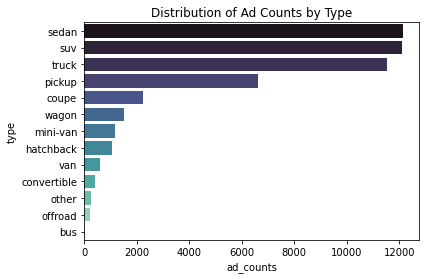

In [102]:
type_pivot = df_copy.pivot_table(index='type', values='price', aggfunc={'price': ['count', 'mean']})
type_pivot.columns = ['ad_counts', 'avg_price']
type_pivot['type'] = type_pivot.index
type_pivot = type_pivot.sort_values(by='ad_counts', ascending=False)

sns.barplot(data=type_pivot, x='ad_counts', y='type', palette='mako')
plt.title('Distribution of Ad Counts by Type')
plt.show()

The two types of vehicle with the greatest number of ads:
- sedan
- SUV

The two types of vehicle with the least number of ads:
- offroad
- bus

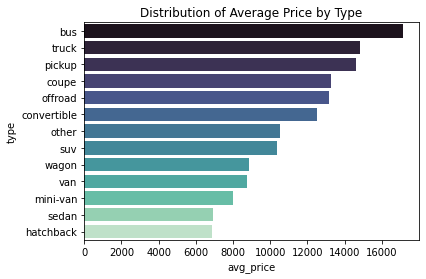

In [103]:
type_pivot = type_pivot.sort_values(by='avg_price', ascending=False)

sns.barplot(data=type_pivot,x='avg_price', y='type', palette='mako')
plt.title('Distribution of Average Price by Type')
plt.show()

## Price factors

**Exploring what factors impact the price most** 

In [104]:
popular_types = df_copy['type'].value_counts()[df_copy['type'].value_counts() >= 50].index
filtered_df = df_copy[df_copy['type'].isin(popular_types)]
print(popular_types)

Index(['suv', 'truck', 'sedan', 'pickup', 'coupe', 'wagon', 'mini-van',
       'hatchback', 'van', 'convertible', 'other', 'offroad'],
      dtype='object')


The three most popular types of vehicles are:
- suv
- truck
- sedan

The above categories contain at least 50 ads – this is to ensure the validity of the analysis.

In [106]:
sedan_df = filtered_df[filtered_df['type'] == 'sedan']
suv_df = filtered_df[filtered_df['type'] == 'suv']

**Analysis for various factors thats affects price of Sedans**

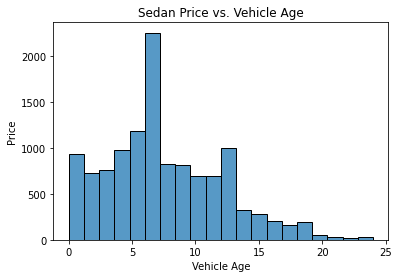

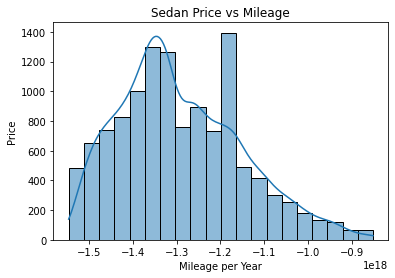

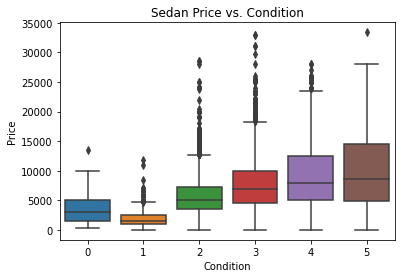

In [107]:
# Analysis for Sedan
sns.histplot(data=sedan_df, x='vehicle_age', bins=20)
plt.title('Sedan Price vs. Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Price')
plt.show()

sns.histplot(data=sedan_df, x='mileage_per_year', bins=20, kde=True)
plt.title('Sedan Price vs Mileage')
plt.xlabel('Mileage per Year')
plt.ylabel('Price')
plt.show()

sns.boxplot(x='condition', y='price', data=sedan_df)
plt.title('Sedan Price vs. Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

**Interpretation of the graphs for various factors that affects price of Sedans**

Sedans Vehicle Age:
- The newer the Sedan the higher the price
- Sedans around the first five years are around 1000 price points  
- Sedans around sixth year are priced at above 2000 price points
- Sedans between seven and twelve years depreciate below 1000 price points 
- Sedans around the thirteens year are priced at above 1000 price points
- There after the prices depreciate below 500 price points

Sedans Mileage:
-	Positively skewed: The lower the milage the higher the price

Sedans Condition:

Index:
new = 5
like new = 4
excellent = 3
good = 2
fair = 1
salvage = 0

- New sedans are priced between 5000 and 14000 price points with a median price of approximately 7000
- Like New sedans are priced between 5000 and 13000 price points with a median price of approximately 6800
- Excellent sedans are priced between 4800 and 10000 price points with a median price of approximately 6500
- Good sedans are priced between 2500 and 6000 price points with a median price of approximately 6500
- Fair sedans are priced between 1000 and below 2500 price points
- Salvage sedans are priced between 1000 and 5000 price points with a median price of approximately 2500

It is notable that the salvage sedans are priced higher than the fair once this could be because the salvage ones maybe high value due to their ability to get refurbished. 


**Analysis for various factors thats affects price of SUVs**

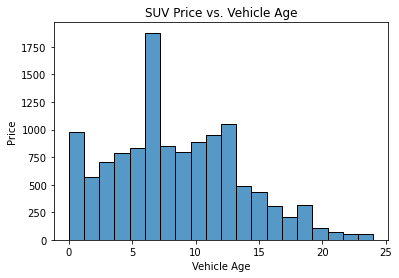

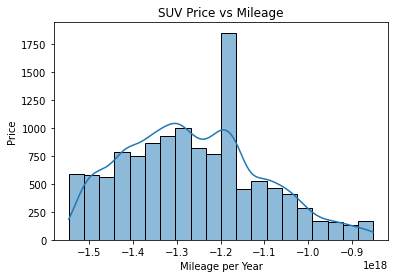

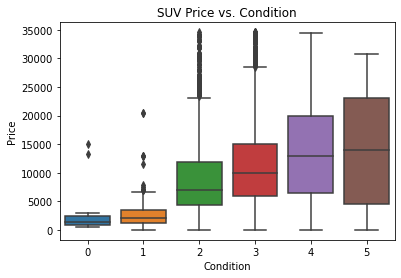

In [115]:
# Analysis for SUV
sns.histplot(data=suv_df, x='vehicle_age', bins=20)
plt.title('SUV Price vs. Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Price')
plt.show()

sns.histplot(data=suv_df, x='mileage_per_year', bins=20, kde=True)
plt.title('SUV Price vs Mileage')
plt.xlabel('Mileage per Year')
plt.ylabel('Price')
plt.show()

sns.boxplot(x='condition', y='price', data=suv_df)
plt.title('SUV Price vs. Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

**Interpretation of the graphs for various factors that affects price of SUVs**

SUVs Vehicle Age:
- Generally the newer the Sedan the higher the price
- SUVs around the first year are around 1000 price points  
- SUVs around second and fifth years are priced at below 1000 price points
- SUVs around the sixth year are around 1750 price points  
- SUVs between seven and eleventh years at priced  around 1000 price points
- SUVs after the twelfth year depreciate below 500 price points

SUVs Mileage:
-	Positively skewed: The lower the milage the higher the price

SUVs Condition:

Index:
new = 5
like new = 4
excellent = 3
good = 2
fair = 1
salvage = 0

- New SUVs are priced between 4500 and 23000 price points with a median price of approximately 13000
- Like New SUVs are priced between 5500 and 20000 price points with a median price of approximately 13000
- Excellent SUVs are priced between 5000 and 14000 price points with a median price of approximately 6000
- Good SUVs are priced between 1000 and 2000 price points with a median price of approximately 6500
- Fair SUVs are priced between 1000 and 2500 price points
- Salvage SUVs are priced between 1000 and below 2000 price points


**Analysing relationships between price and categorical variables(paint_color and transmission)** 

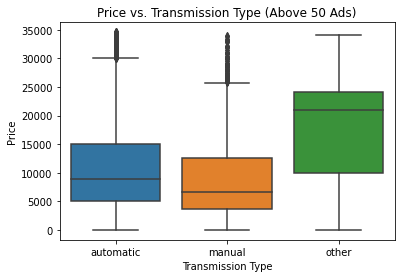

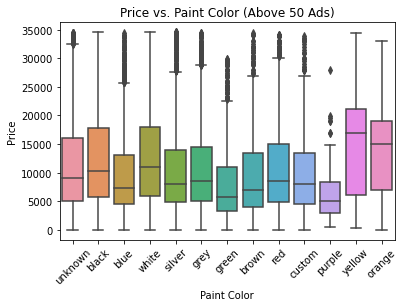

In [116]:
# Filter for instances with more than 50 ads
popular_paint_colors = filtered_df['paint_color'].value_counts()[filtered_df['paint_color'].value_counts() >= 50].index
popular_transmissions = filtered_df['transmission'].value_counts()[filtered_df['transmission'].value_counts() >= 50].index

filtered_paint_color_df = filtered_df[filtered_df['paint_color'].isin(popular_paint_colors)]
filtered_transmission_df = filtered_df[filtered_df['transmission'].isin(popular_transmissions)]

# Boxplot for Transmission Type
sns.boxplot(x='transmission', y='price', data=filtered_transmission_df)
plt.title('Price vs. Transmission Type (Above 50 Ads)')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.show()

# Boxplot for Paint Color
sns.boxplot(x='paint_color', y='price', data=filtered_paint_color_df)
plt.title('Price vs. Paint Color (Above 50 Ads)')
plt.xlabel('Paint Color')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

**Interpretation of the graphs**

Transmission Type:
-	The Automatic vehicles generally cost more than the manual vehicles
-	Automatic vehicles are priced between 5000 and 15000 price points with a median price of approximately 9000
-	Manual are priced between 4500 and 13000 price points with a median price of approximately 7000

Paint Colors:
-	The pain colors are generally evenly spread


**Establishing the correlation that price has on the:**
- type              
- days_listed       
- vehicle_age       
- mileage_per_year  
- condition         
- cylinders        
- transmission
- fuel      
- paint_color

In [117]:
selected_type = ['SUV', 'truck', 'sedan']
filtered_df = df_copy[['type','days_listed', 'price','vehicle_age','mileage_per_year','condition','cylinders','fuel','transmission','paint_color',]].copy()
filtered_df = filtered_df.query('type == @selected_type')
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24507 entries, 12 to 51480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              24507 non-null  object 
 1   days_listed       24507 non-null  int64  
 2   price             23697 non-null  float64
 3   vehicle_age       24323 non-null  float64
 4   mileage_per_year  24165 non-null  float64
 5   condition         24507 non-null  int64  
 6   cylinders         24507 non-null  float64
 7   fuel              24507 non-null  object 
 8   transmission      24507 non-null  object 
 9   paint_color       24507 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 2.1+ MB


In [118]:
filtered_df.corr()

,days_listed,price,vehicle_age,mileage_per_year,condition,cylinders
days_listed,1.000000,0.005621,0.007486,0.006106,-0.004296,0.001809
price,0.005621,1.000000,-0.426521,-0.426281,0.186595,0.410923
vehicle_age,0.007486,-0.426521,1.000000,0.995474,-0.328408,0.105424
mileage_per_year,0.006106,-0.426281,0.995474,1.000000,-0.324082,0.100251
condition,-0.004296,0.186595,-0.328408,-0.324082,1.000000,-0.079956
cylinders,0.001809,0.410923,0.105424,0.100251,-0.079956,1.000000


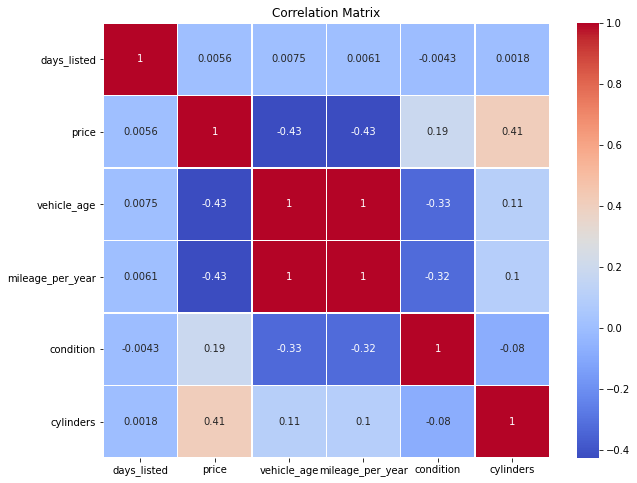

In [119]:
correlation_matrix = filtered_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### **The Purpose of this project:** <a id='data_review'></a>
This data attempts to find the factors that influence the price of a vehicles. 


### The original Hypothesis tested:

The factors that influence the price of a vehicles are:
-	vehicle's age
-	mileage
-	vehicle condition

These are not sensitive to the price
- Transmission Type
- Paint Color

In the Data Quality Assessment 
-	Missing values were identified and corrected
-	Incorrect data types were corrected
-	More columns were included in the table by calculations of the existing data
-	Outliers were removed bay establishing the lower and upper limits

### Conclution from the Data Analysis

The vehicle price
-	Most vehicles are priced between 5000 and 17000 price points
-	The Median (Q2) is placed at 8500 price points

The typical lifetime of an advertisement ran between **19 and 53 days**

The impact of the below on the price:

- **Vehicle Age:**  The newer the vehicle the higher the price
- **Mileage:** The lower the milage the higher the price
- **Condition:** Vehicles in better conditions cost more
- **Transmission Type:** The Automatic vehicles generally cost more than the manual vehicles
- **Paint Colors:** The pain colors are generally evenly spread and therefore not 

**The original hypothesis is correct the vehicle Vehicle Age, Mileage and Condition have an impact on the vehicle price.**
